# Talkin' Bout Heroes, Villians, and Other Comic Book Characters

In [1]:
#Add the pandas
#Add the numpy
#Add the plot library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (6,4)

plt.style.use('fast')

In [2]:
#then bring over the csv file
superheroes = pd.read_csv("SuperheroData.csv", parse_dates = ["FIRST_YEAR"])

In [3]:
#Let's see how many characters there are in total
print("Total Number of Characters:" + " " + str(len(superheroes)))

Total Number of Characters: 23420


### Let's explore the file a bit more
How many characters are heroes, villians, or something else?

Let's graph a bar chart for the data to see how they stack up

List of character alignments:
Bad                   9616
Good                  7584
ND                    3437
Neutral               2779
Reformed Criminals       3
Name: ALIGN, dtype: int64


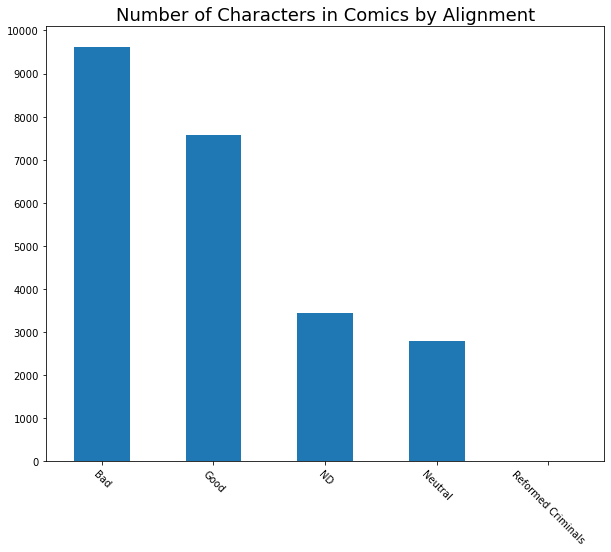

In [4]:
#Let's explore the file a bit...can we find out how many characters are heroes, villans, or others?
character_count = superheroes["ALIGN"].value_counts()
print("List of character alignments:")
print(character_count)
#this is the character count by their alignment in a bar chart
character_count.plot(kind="bar", subplots=True, figsize = (10,8), fontsize=10)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.xticks(rotation = -45)
plt.title("Number of Characters in Comics by Alignment", fontsize = 18)

plt.show()

#### I also want to look at the comparison of percentages on a pie chart

#### This will help with the visualization of the data. Because these numbers are pretty high, I'm going to change the decimal place of the percentage so that the lowest value is not just a 0.

In [5]:
def my_autopct(pct):
    if pct > 0:
        return ("%1.2f%%" % pct)
    else:
        return " "

List of Character Alignments: 
Bad                   9616
Good                  7584
ND                    3437
Neutral               2779
Reformed Criminals       3
Name: ALIGN, dtype: int64


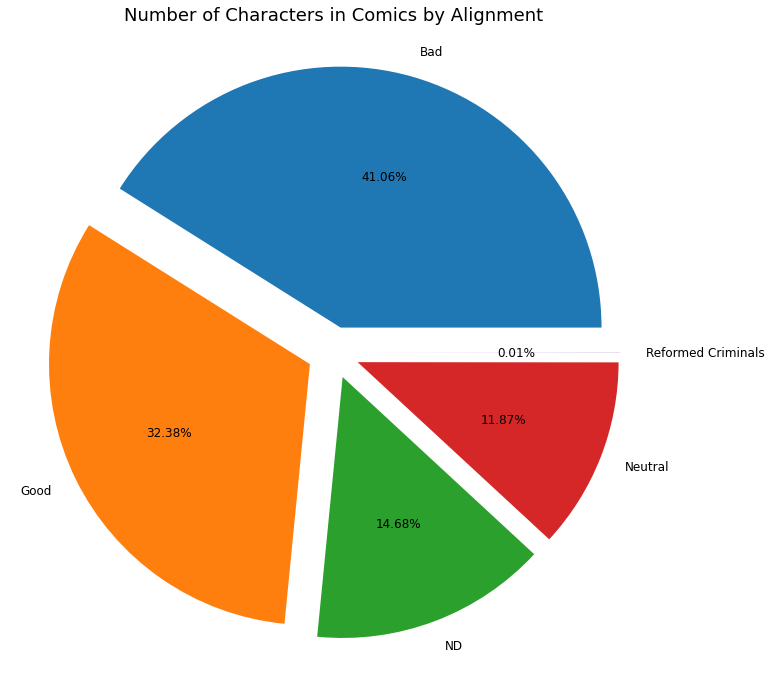

In [6]:
explode = (0.1,0.1,0.1,0.1,0.1)
character_count.plot(kind="pie", autopct=my_autopct, figsize=(18,12), explode = explode, fontsize=12)
plt.title("Number of Characters in Comics by Alignment", fontsize=18)
plt.ylabel('')
print("List of Character Alignments: ")
print(character_count)

plt.show()

#### Now that we know the percentages of character alignments, let's drill into the data for further details.
#### I really want to explore how many female characters there are in comic books.

In [7]:
female_count = superheroes.drop(superheroes[superheroes.SEX != "Female"].index)
print("Total Number of Female Characters:" + " " + str(len(female_count)))

Total Number of Female Characters: 5853


#### So there's only *5853* female characters out of 23,420 characters total. 
#### I wonder how many of them don't have data listed for their sex

In [8]:
sex_NDcount = superheroes.drop(superheroes[superheroes.SEX != "ND"].index)
print("Total Number of Characters without SEX identified:" + " " + str(len(sex_NDcount)))


Total Number of Characters without SEX identified: 978


#### Now that we know that there are only 978 characters out of 23,420 that we do not know the sex of, we're going to look at a breakdown of all the characters by their sex and see what kind of data that we get. 

In [9]:
sex_count = superheroes["SEX"].value_counts()
print("Total Number of Characters:" + " " + str(len(superheroes)))
print("Breakdown of Characters by Sex:")
print(sex_count)



Total Number of Characters: 23420
Breakdown of Characters by Sex:
Male           16521
Female          5853
ND               978
Agender           45
Genderless        20
Genderfluid        2
Transgender        1
Name: SEX, dtype: int64


#### So now that we know both the break down of characters by their alignment and their sex, let's see if we can find how those values relate to one another. I'm going to compare the sex of a character by their alignment and see how many fall into each category. 

In [10]:
align_by_sex = pd.crosstab(superheroes["SEX"], superheroes["ALIGN"])
align_by_sex

ALIGN,Bad,Good,ND,Neutral,Reformed Criminals
SEX,,,,,
Agender,20,10,2,13,0
Female,1573,2528,913,837,1
Genderfluid,0,1,0,1,0
Genderless,11,6,0,3,0
Male,7562,4888,2265,1804,2
ND,449,151,257,121,0
Transgender,1,0,0,0,0


In [11]:
#cool cool cool, let's get a little deeper and get rid of the ND points and the low data points
align_NDless = superheroes.drop(superheroes[superheroes.ALIGN == "ND"].index)
align_sex_NDless = align_NDless.drop(align_NDless[align_NDless.SEX == "ND"].index)
alignbysex_fluidless = align_sex_NDless.drop(align_sex_NDless[align_sex_NDless.SEX == "Genderfluid"].index)
alignbysex_transless = alignbysex_fluidless.drop(alignbysex_fluidless[alignbysex_fluidless.SEX == "Transgender"].index)
alignbysex_noRC = alignbysex_transless.drop(alignbysex_transless[alignbysex_transless.ALIGN == "Reformed Criminals"].index)
align_by_sex = pd.crosstab(alignbysex_noRC["SEX"], alignbysex_noRC["ALIGN"])

align_by_sex

ALIGN,Bad,Good,Neutral
SEX,,,
Agender,20,10,13
Female,1573,2528,837
Genderless,11,6,3
Male,7562,4888,1804


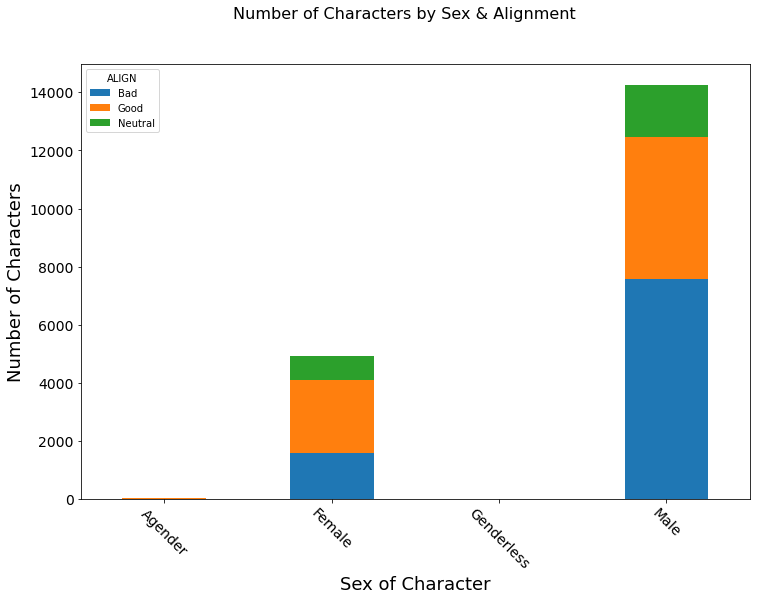

In [12]:
align_by_sex.plot(kind = "bar", stacked = True, subplots = False, figsize=(12,8), fontsize = 14)

plt.suptitle("Number of Characters by Sex & Alignment", fontsize = 16)
plt.xticks(rotation=-45)
plt.ylabel("Number of Characters", fontsize=18)
plt.xlabel("Sex of Character", fontsize =18)

plt.show()

#### Because there is such a high number of male characters and such a small number of agender and genderless characters, that bar chart looks a little skewed. For our data, let's just look at the females. 

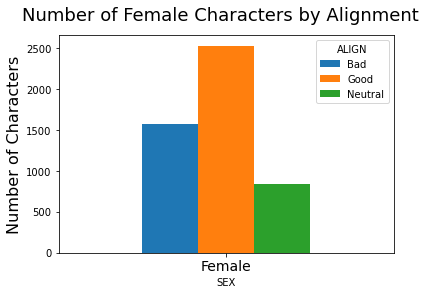

In [13]:
alignsex_female = alignbysex_noRC.drop(alignbysex_noRC[alignbysex_noRC.SEX != "Female"].index)
alignsex = pd.crosstab(alignsex_female["SEX"], alignsex_female["ALIGN"])
alignsex.plot(kind = "bar")
plt.suptitle("Number of Female Characters by Alignment", fontsize=18)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 10)
plt.ylabel("Number of Characters", fontsize = 16)


plt.show()

#### Now that we know the alignment of female characters, let's start exploring some other details of female characters. We'll come back to the alignment piece a little later on as we hash out some more of the data. 

#### Let's take a look at the which month had the most first appearances by female characters. We're going to go back to our superheroes csv file and just parse out the female characters. We're also going to get rid of the NDs in the months as well. 

In [14]:
females_only = superheroes.drop(superheroes[superheroes.SEX != "Female"].index)
fem_firstmonth_NDless = females_only.drop(females_only[females_only.FIRST_MONTH == "ND"].index)
females_by_firstmonth = pd.crosstab(fem_firstmonth_NDless["FIRST_MONTH"], ["SEX"])
females_by_firstmonth.sort_values(['SEX'], ascending = False, inplace = True)
females_by_firstmonth.columns = ["Females Only"]
females_by_firstmonth


,Females Only
FIRST_MONTH,
August,540
September,517
December,507
October,493
November,482
June,481
January,464
July,457
February,437


#### Now that we've sorted the number of female characters by their month of first appearances, we can take a look at the breakdown of the alignment within each month of those characters. 

In [15]:
align_rcless = fem_firstmonth_NDless.drop(fem_firstmonth_NDless[fem_firstmonth_NDless.ALIGN == "Reformed Criminals"].index)
firstmonth_holidayless = align_rcless = align_rcless.drop(align_rcless[align_rcless.FIRST_MONTH == "Holiday"].index)
align_monthfemales = firstmonth_holidayless.groupby(["ALIGN", "FIRST_MONTH"])["FIRST_MONTH"].count().unstack().fillna(0).astype(int)
align_monthfemales

FIRST_MONTH,April,August,December,February,January,July,June,March,May,November,October,September
ALIGN,,,,,,,,,,,,
Bad,89,161,131,116,128,128,152,104,113,124,137,140
Good,168,223,221,196,198,195,201,171,163,203,208,235
ND,70,82,97,65,71,51,58,76,64,88,74,80
Neutral,53,74,58,60,67,83,70,62,61,67,74,62


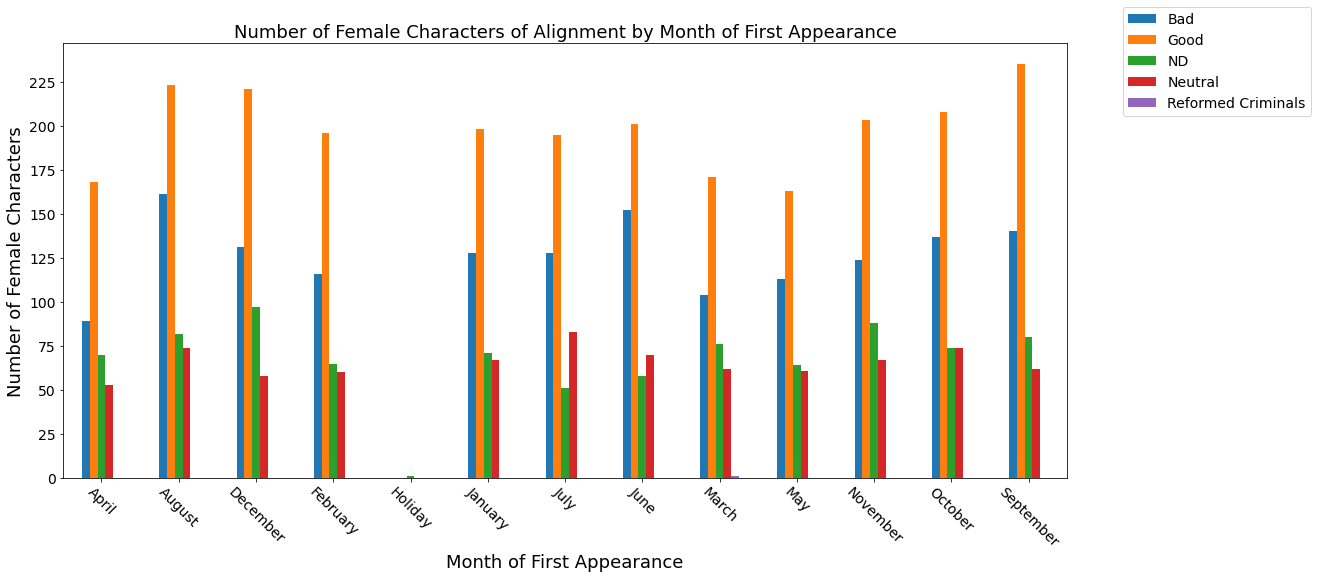

In [16]:
females_by_month = fem_firstmonth_NDless.groupby(["FIRST_MONTH", "ALIGN"])["ALIGN"].count().unstack().fillna(0).astype(int)
females_by_month.plot(kind = "bar", figsize=(18,8))

plt.legend(bbox_to_anchor=(1.25, 1.10), loc="upper right", fontsize=14)
plt.title("Number of Female Characters of Alignment by Month of First Appearance", fontsize=18)
plt.ylabel("Number of Female Characters", fontsize=18)
plt.xlabel("Month of First Appearance", fontsize=18)
plt.xticks(rotation=-45, fontsize=14)
plt.yticks([0,25,50,75,100,125,150,175,200,225],fontsize=14)

plt.show()


In [17]:
#Thanks to Wendy Norris for providing some of the skeleton needed in the beginning for this project
#And also for helping me hash out the details when I ran into a problem!
